In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#Read xls File and Load to a dataframe

df = pd.read_excel('weather2015_2019(1).xlsx')
#print(df)
df = df.drop(columns = df.columns[13:])
df = df.drop(columns = df.columns[0:1])
df = df.dropna()
df

,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
0,2015-01-01,1900-01-01 00:00:00,1024.1,-8.777778,68,-13.611111,0.0,0.00000,157.5,1.78816,0
1,2015-01-01,1900-01-01 00:30:00,1028.0,-6.555556,49,-15.500000,0.0,2.23520,270.0,8.04672,0
2,2015-01-01,1900-01-01 01:00:00,1028.2,-6.833333,50,-15.555556,0.0,1.78816,247.5,6.25856,0
3,2015-01-01,1900-01-01 01:30:00,1029.3,-7.222222,52,-15.444444,0.0,3.12928,225.0,6.70560,0
4,2015-01-01,1900-01-01 02:00:00,1029.5,-7.000000,53,-15.000000,0.0,4.02336,225.0,7.59968,0
...,...,...,...,...,...,...,...,...,...,...,...
84849,2020-07-13,1900-01-01 08:30:00,1011.1,23.222222,84,20.388889,0.0,0.44704,135.0,1.78816,272
84850,2020-07-13,1900-01-01 09:00:00,1011.0,24.611111,76,20.111111,0.0,0.00000,135.0,1.34112,452
84851,2020-07-13,1900-01-01 09:30:00,1011.1,24.888889,74,19.944444,0.0,0.44704,135.0,2.23520,497
84852,2020-07-13,1900-01-01 10:00:00,1011.0,26.444444,70,20.555556,0.0,0.00000,202.5,1.34112,640


In [4]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)

#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)

In [5]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2016

,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
16010,2016-03-01,1900-01-01 00:00:00,1013.6,5.166667,64,-1.111111,0.0,2.68224,180.0,7.15264,0
16011,2016-03-01,1900-01-01 00:30:00,1014.4,5.722222,60,-1.444444,0.0,2.23520,180.0,8.04672,0
16012,2016-03-01,1900-01-01 01:00:00,1016.6,5.888889,60,-1.277778,0.0,4.91744,270.0,14.75232,0
16013,2016-03-01,1900-01-01 01:30:00,1017.9,3.944444,59,-3.333333,0.0,6.25856,270.0,16.54048,0
16014,2016-03-01,1900-01-01 02:00:00,1018.8,2.666667,59,-4.555556,0.0,6.70560,270.0,17.88160,0
...,...,...,...,...,...,...,...,...,...,...,...
18534,2016-04-30,1900-01-01 21:30:00,1027.1,11.166667,55,2.444444,0.0,4.02336,157.5,10.72896,0
18535,2016-04-30,1900-01-01 22:00:00,1027.2,9.944444,57,1.833333,0.0,5.36448,157.5,9.83488,0
18536,2016-04-30,1900-01-01 22:30:00,1027.5,9.444444,58,1.611111,0.0,4.02336,157.5,8.49376,0
18537,2016-04-30,1900-01-01 23:00:00,1027.4,9.055556,58,1.222222,0.0,2.68224,180.0,8.49376,0


### Case 1 - 'Data'

In [6]:
#Separate specific time
#df2015_2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-0-01", "2019-12-31")])]
df2015_2019 = pd.concat([df2015,df2016,df2017,df2018])
df15_19_noon = df2015_2019[df2015_2019["Time"]== '12:00:00']

#change dates to remove year
#print(df15_19_noon)

#Plot dates by temps for 2015
date15_19_noon = df15_19_noon['Date']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

#print(date15_19_noon)
date15_19_noon = date15_19_noon.astype(str)
date15_19_noon = date15_19_noon.str.split("-").str[-1].astype(int)

date15_19_noon = date15_19_noon.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_19_noon,temp15_19_noon)
temp15_19_noon_pred = model.predict(date15_19_noon)

MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

#draw scatter plot
plt.scatter(date15_19_noon,temp15_19_noon, s=2)
plt.plot(date15_19_noon, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in March 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")
df15_19_noon

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

0.1415959609862275
31.683961052686


Text(0, 0.5, 'Air Temp (°C)')

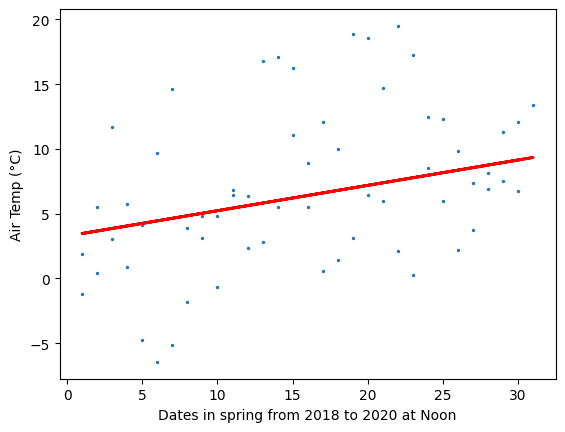

In [31]:
##Plot dates by temps for 2020
df18_20 =pd.concat([df2019])
df18_20_noon = df18_20[df18_20["Time"]== '12:00:00']
date18_20_noon = df18_20_noon['Date']
temp18_20_noon = df18_20_noon['Air Temp (°C)']

date18_20_noon = date18_20_noon.astype(str)
date18_20_noon = date18_20_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date18_20_noon = date18_20_noon.to_numpy().reshape(-1,1)
temp18_20_noon = temp18_20_noon.to_numpy().reshape(-1,1)

# predict 2020 air temperature at noon
temp18_20_noon_pred = model.predict(date18_20_noon)

MSE= mean_squared_error(temp18_20_noon, temp18_20_noon_pred)
R2= r2_score(temp18_20_noon, temp18_20_noon_pred)

print (R2)
print (MSE)

# draw scatter plot
plt.scatter(date18_20_noon,temp18_20_noon, s=2)
plt.plot(date18_20_noon, temp18_20_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")

### Case 2 - 'Barometric Pressure (mbar)'

0.008445640430280066
46.31172271074639


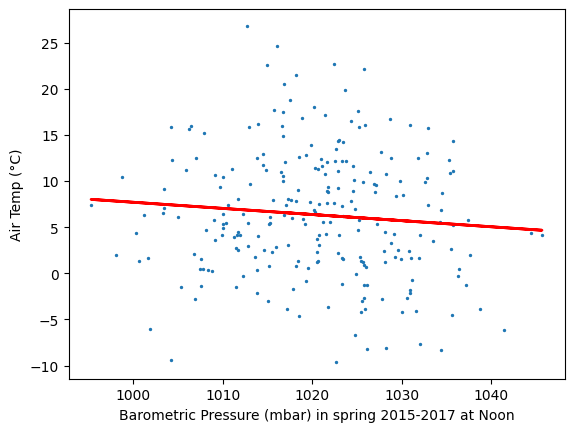

In [32]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pressure15_17 = df15_17_noon[['Barometric Pressure (mbar)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']


# convert to 2-D array
pressure15_17 = pressure15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pressure15_17,temp15_17_noon)
temp15_17_noon_pred = model.predict(pressure15_17)

plt.scatter(pressure15_17,temp15_17_noon, s=2)
plt.plot(pressure15_17, temp15_17_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_17_noon, temp15_17_noon_pred)
R2= r2_score(temp15_17_noon, temp15_17_noon_pred)

print (R2)
print (MSE)

0.04551914859283557
35.23018619095053


(array([ 990., 1000., 1010., 1020., 1030., 1040., 1050.]),
 [Text(990.0, 0, '990'),
  Text(1000.0, 0, '1000'),
  Text(1010.0, 0, '1010'),
  Text(1020.0, 0, '1020'),
  Text(1030.0, 0, '1030'),
  Text(1040.0, 0, '1040'),
  Text(1050.0, 0, '1050')])

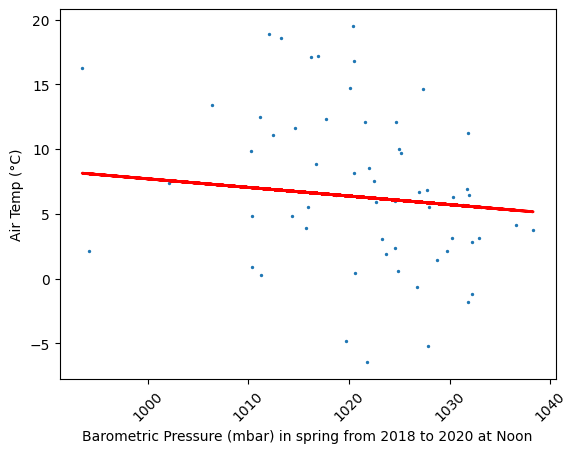

In [33]:
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Barometric Pressure (mbar)']
temp2020_noon = df2020_noon['Air Temp (°C)']

pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3 - Gust Speed and air temp


0.02355525392947566
45.60601028672462


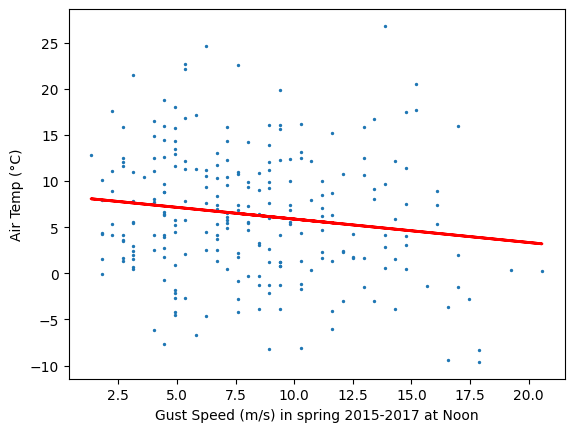

In [34]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

gSpeed15_19 = df15_17_noon[['Gust Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_19 = gSpeed15_19.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_19,temp15_17_noon)
temp15_17_noon_pred = model.predict(gSpeed15_19)

plt.scatter(gSpeed15_19,temp15_17_noon, s=2)
plt.plot(gSpeed15_19, temp15_17_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_17_noon, temp15_17_noon_pred)
R2= r2_score(temp15_17_noon, temp15_17_noon_pred)

print (R2)
print (MSE)

-0.0004332664451944801
36.92630417522117


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

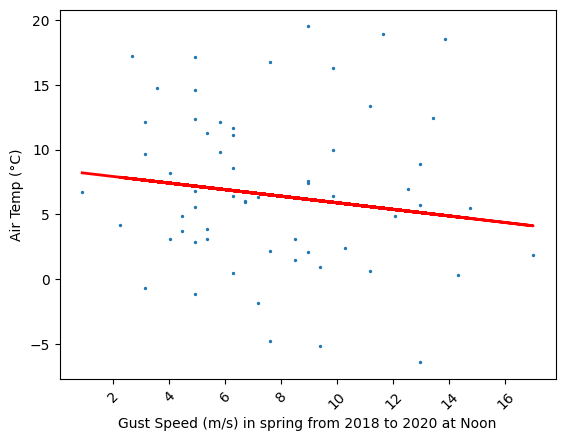

In [35]:
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Gust Speed (m/s)']
temp2020_noon = df2020_noon['Air Temp (°C)']

pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 - Barometric Pressure (mbar),Gust Speed (m/s) and Air Temp

In [36]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,2)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)



0.04138642949670557
44.773184077544784


In [37]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
# plt.scatter(pre2020_noon, temp2020_noon, s = 2)
# plt.xlabel("Barometric Pressure (mbar) in spring 2020 at Noon")
# plt.ylabel("Air Temp (°C)")
# plt.xticks(rotation=45)


0.08263131679064939
33.86036447726053


### Case 5 - Wind Speed (m/s)

0.03018849670796031
45.29619681329736


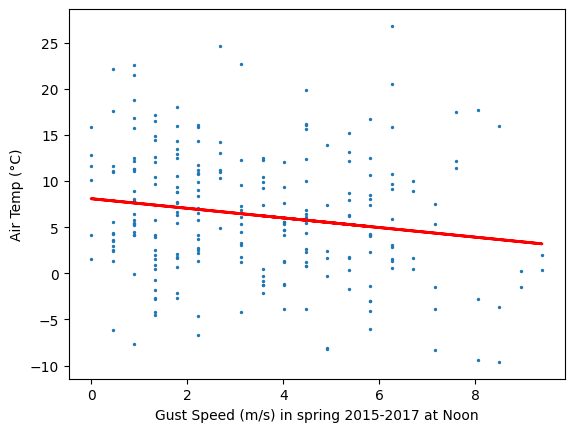

In [48]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

gSpeed15_19 = df15_17_noon[['Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_19 = gSpeed15_19.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_19,temp15_17_noon)
temp15_17_noon_pred = model.predict(gSpeed15_19)

plt.scatter(gSpeed15_19,temp15_17_noon, s=2)
plt.plot(gSpeed15_19, temp15_17_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_17_noon, temp15_17_noon_pred)
R2= r2_score(temp15_17_noon, temp15_17_noon_pred)

print (R2)
print (MSE)

-0.024069855783821037
37.798738066473355


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

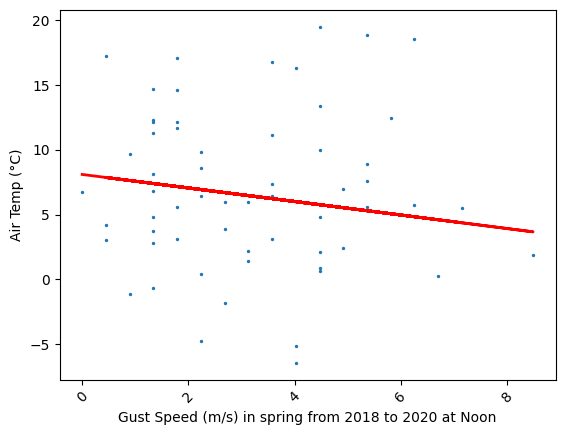

In [49]:
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Wind Speed (m/s)']
temp2020_noon = df2020_noon['Air Temp (°C)']

pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 - 'Wind Speed (m/s)','Barometric Pressure (mbar)'

In [50]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,2)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.049440007280618925
44.39703217265087


In [51]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.0581483126607617
34.76403980268811


### Case 8
##### x: 'Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)'\n
##### y: 'Air Temp (°C)'

In [53]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,3)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.050635415008539075
44.34119923652647


In [54]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,3)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.042269285501597365
35.35013965217569


### Case 6
##### x: 'RH (%)'
##### y: 'Air Temp (°C)'

In [52]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

pre15_17 = df15_17_noon['RH (%)']
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.00014495424339910912
46.69941610676209


-0.0171928208008143
37.54490455840892


(array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

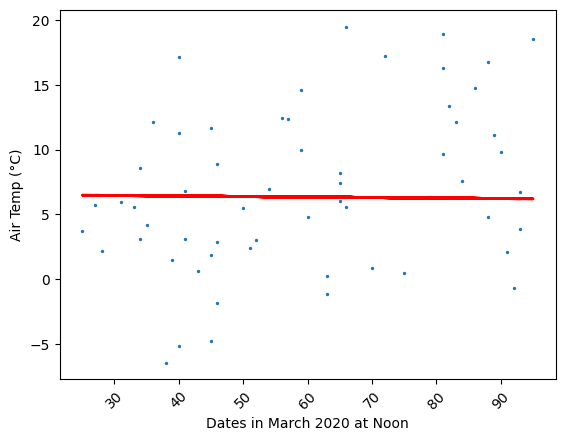

In [45]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2020_noon = df2020_noon['RH (%)']
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xlabel("Dates in March 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 -Dew Point (°C)

0.5974434111352676
18.801883062646713


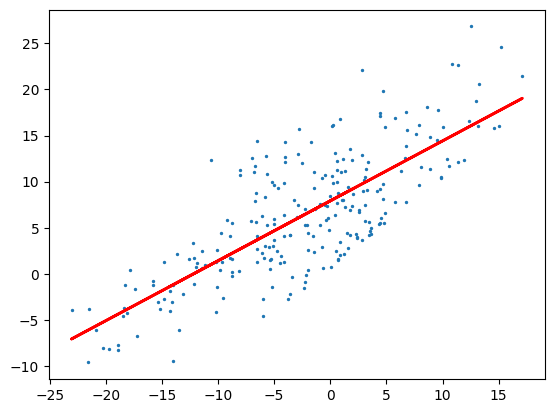

In [46]:
# plot linear regression
df2015_2017 = pd.concat([df2015,df2016,df2017,df2018])
df15_17_noon = df2015_2017[df2015_2017["Time"]== '12:00:00']

dp15_17 = df15_17_noon['Dew Point (°C)']
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
dp15_17 = dp15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dp15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(dp15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp15_17, temp15_17_noon, s = 2)
plt.plot(dp15_17, temp15_19_noon_pred, color='red', linewidth=2)

0.7067541632953123
10.82379537692806


(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(-25.0, 0, '−25'),
  Text(-20.0, 0, '−20'),
  Text(-15.0, 0, '−15'),
  Text(-10.0, 0, '−10'),
  Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20')])

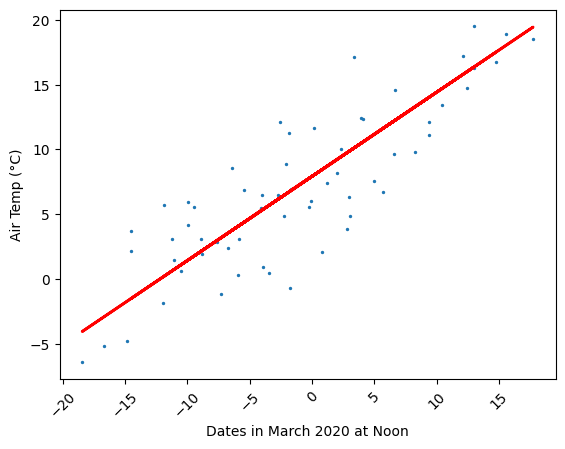

In [47]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
dp2020_noon = df2020_noon['Dew Point (°C)']
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
dp2020_noon = dp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(dp2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp2020_noon, temp2020_noon, s = 2)
plt.plot(dp2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xlabel("Dates in March 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)